In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

In [28]:
main_path = 'C:\\Users\\Sumed\\Documents\\'
df = pd.read_csv(main_path + 'sample.csv')
display(df)

,age,monthly_charges,tenure,internet_service,churn
0,23,45.2,2,DSL,0
1,35,78.5,10,Fiber,1
2,52,65.1,24,DSL,0
3,46,89.3,5,Fiber,1
4,29,55.0,12,DSL,0
5,41,92.1,3,Fiber,1
6,50,70.8,20,Fiber,0
7,31,49.5,8,DSL,0
8,58,101.4,1,Fiber,1
9,37,60.2,15,DSL,0


In [29]:
# check number  of columns and rows in the data
print(df.shape)

# check number of missing values
print(df.isnull().sum().sum(), "total missing values")
print(df.isnull().sum()) #per column

(15, 5)
0 total missing values
age                 0
monthly_charges     0
tenure              0
internet_service    0
churn               0
dtype: int64


In [ ]:
df_encoded = pd.get_dummies(df, columns=["internet_service"], drop_first=False)
display(df_encoded)

X = df_encoded[['age', 'monthly_charges', 'tenure', 'internet_service_DSL', 'internet_service_Fiber']]
y = df_encoded['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression())
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

y_test_pred = pipe.predict(X_test)
y_train_pred = pipe.predict(X_train)

print(accuracy_score(y_train_pred,y_train))
print(accuracy_score(y_test_pred,y_test))

,age,monthly_charges,tenure,churn,internet_service_DSL,internet_service_Fiber
0,23,45.2,2,0,True,False
1,35,78.5,10,1,False,True
2,52,65.1,24,0,True,False
3,46,89.3,5,1,False,True
4,29,55.0,12,0,True,False
5,41,92.1,3,1,False,True
6,50,70.8,20,0,False,True
7,31,49.5,8,0,True,False
8,58,101.4,1,1,False,True
9,37,60.2,15,0,True,False


1.0
0.8


[[0.04991863 0.95008137]
 [0.92390074 0.07609926]
 [0.91991029 0.08008971]
 [0.08116085 0.91883915]
 [0.22860287 0.77139713]]
[0.95008137 0.07609926 0.08008971 0.91883915 0.77139713]
AUC: 1.0


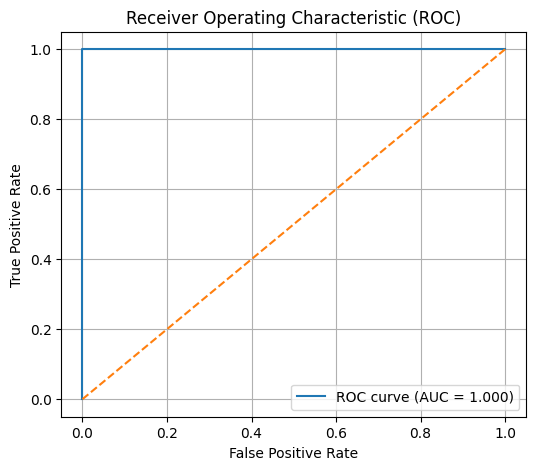

In [38]:
y_proba = pipe.predict_proba(X_test)
print(y_proba)
y_pred_prob = pipe.predict_proba(X_test)[:, 1]
print(y_pred_prob)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)
# or: roc_auc = auc(fpr, tpr)

print("AUC:", roc_auc)

# Plot ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], linestyle='--')   # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid()
plt.show()
